In [1]:
library('igraph')

fb_data <- matrix(scan("facebook_combined.txt"), ncol=2, byrow=TRUE)
fb_data = fb_data + 1
facebook_graph = graph_from_edgelist(fb_data, directed = FALSE)


Attaching package: 'igraph'


The following objects are masked from 'package:stats':

    decompose, spectrum


The following object is masked from 'package:base':

    union




In [48]:
# Q5
fb_ego_graph = function(g) {
    user_neighbors = neighbors(g, 1)
    user_vertices = c(1, user_neighbors)
    user_network = induced_subgraph(g, user_vertices)
    plot(user_network, edge.arrow.size=.1, vertex.size=5, vertex.label=NA, main="node ID 1 ego network")
    
    print(paste("Network ID 1 number of nodes: ", vcount(user_network)))
    print(paste("Network ID 1 number of edges: ", ecount(user_network)))
    
    # Q6
    print(paste("Network ID 1 diameter: ", diameter(user_network)))
}

# Q8
fb_core = function(g) {
    cores = c()
    degree_averages = c()
    for(node in V(g)){
        num_neighbors = length(neighbors(g,node))
        if(num_neighbors > 200){
            degree_averages = c(degree_averages, degree(g, node))
            cores = c(cores,node)
        } 
    }

    print(paste('Number of core nodes: ', length(cores)))
    print(paste('Average degree: ', mean(degree_averages)))
}

# Q9
# Code provided by TA
core_communities = function(g, core_list=c(1,108,349,484,1087)) {
    for (core_id in core_list) {
        user_neighbors = neighbors(g, core_id)
        user_vertices = c(core_id, user_neighbors)
        user_network = induced_subgraph(g, user_vertices)

        fast_greedy = cluster_fast_greedy(user_network)
        edge_betweenness = cluster_edge_betweenness(user_network)
        infomap = cluster_infomap(user_network)

        par(mfrow=c(1,3))
        options(repr.plot.width=15, repr.plot.height=4)
        plot(user_network, mark.groups=groups(fast_greedy), vertex.color=fast_greedy$membership, vertex.size=6, vertex.label=NA, main=paste("Fast Greedy for NodeID: ", core_id))
        cat(sprintf("        Modularity of Fast Greedy: %0.3f", modularity(fast_greedy)))
        plot(user_network, mark.groups=groups(edge_betweenness), vertex.color=edge_betweenness$membership, vertex.size=6, vertex.label=NA, main=paste("Edge Betweenness for NodeID: ", core_id))
        cat(sprintf("        Modularity of Edge Betweenness: %0.3f", modularity(edge_betweenness)))
        plot(user_network, mark.groups=groups(infomap), vertex.color=infomap$membership, vertex.size=6, vertex.label=NA, main=paste("Infomap for NodeID: ", core_id))
        cat(sprintf("        Modularity of Infomap: %0.3f", modularity(infomap)))
    }
}

# Code provided by TA
coreless_communities = function(g, core_list=c(1,108,349,484,1087)) {
    for (core_id in core_list) {
        user_neighbors = neighbors(g, core_id)

        user_network = induced_subgraph(g, user_neighbors)

        fast_greedy = cluster_fast_greedy(user_network)
        edge_betweenness = cluster_edge_betweenness(user_network)
        infomap = cluster_infomap(user_network)

        par(mfrow=c(1,3))
        options(repr.plot.width=15, repr.plot.height=4)
        plot(user_network, mark.groups=groups(fast_greedy), vertex.color=fast_greedy$membership, vertex.size=6, vertex.label=NA, main=paste("Fast Greedy for NodeID: ", core_id))
        cat(sprintf("        Modularity of Fast Greedy: %0.3f", modularity(fast_greedy)))
        plot(user_network, mark.groups=groups(edge_betweenness), vertex.color=edge_betweenness$membership, vertex.size=6, vertex.label=NA, main=paste("Edge Betweenness for NodeID: ", core_id))
        cat(sprintf("        Modularity of Edge Betweenness: %0.3f", modularity(edge_betweenness)))
        plot(user_network, mark.groups=groups(infomap), vertex.color=infomap$membership, vertex.size=6, vertex.label=NA, main=paste("Infomap for NodeID: ", core_id))
        cat(sprintf("        Modularity of Infomap: %0.3f", modularity(infomap)))
    }
}

In [9]:
user_neighbors = neighbors(facebook_graph, 1)
user_vertices = c(1, user_neighbors)
user_network = induced_subgraph(facebook_graph, user_vertices)
user_network = delete_vertices(user_network, c(1))

[1] "Network ID 1 number of nodes:  348"
[1] "Network ID 1 number of edges:  2866"
[1] "Network ID 1 diameter:  2"


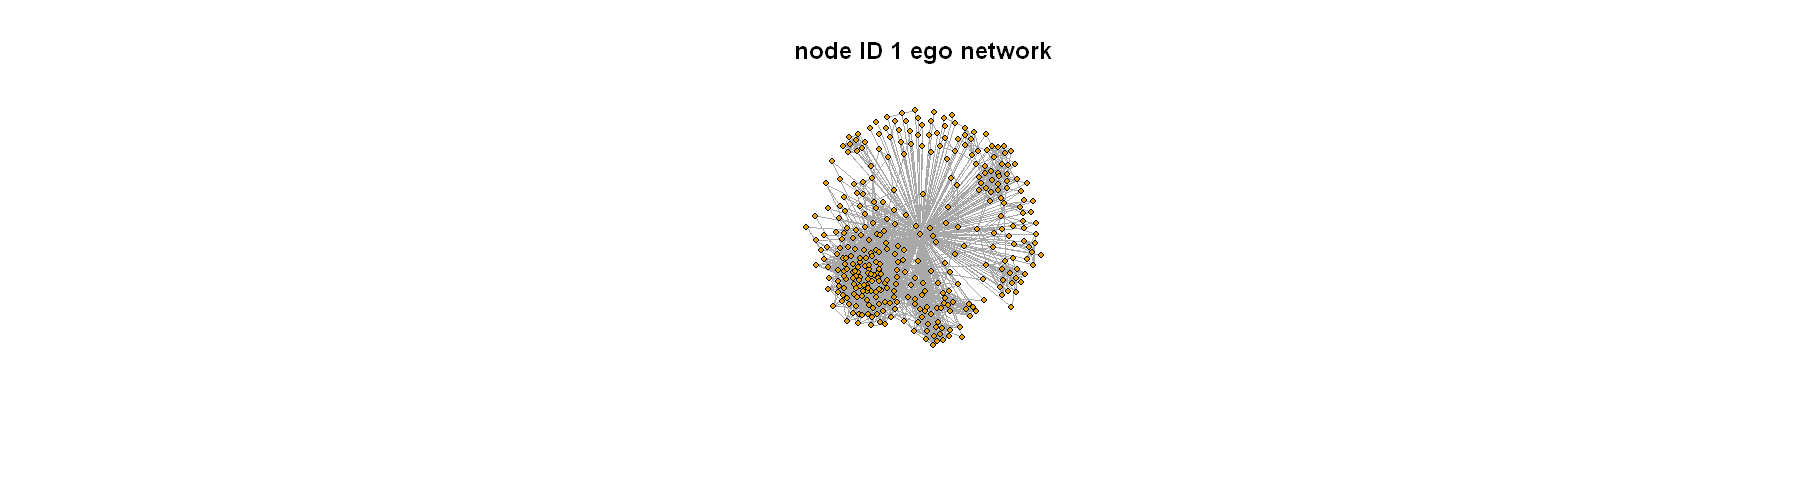

In [11]:
fb_ego_graph(facebook_graph)

In [124]:
fb_core(facebook_graph)

[1] "Number of core nodes:  40"
[1] "Average degree:  279.375"


        Modularity of Fast Greedy: 0.413        Modularity of Edge Betweenness: 0.353        Modularity of Infomap: 0.389        Modularity of Fast Greedy: 0.436        Modularity of Edge Betweenness: 0.507

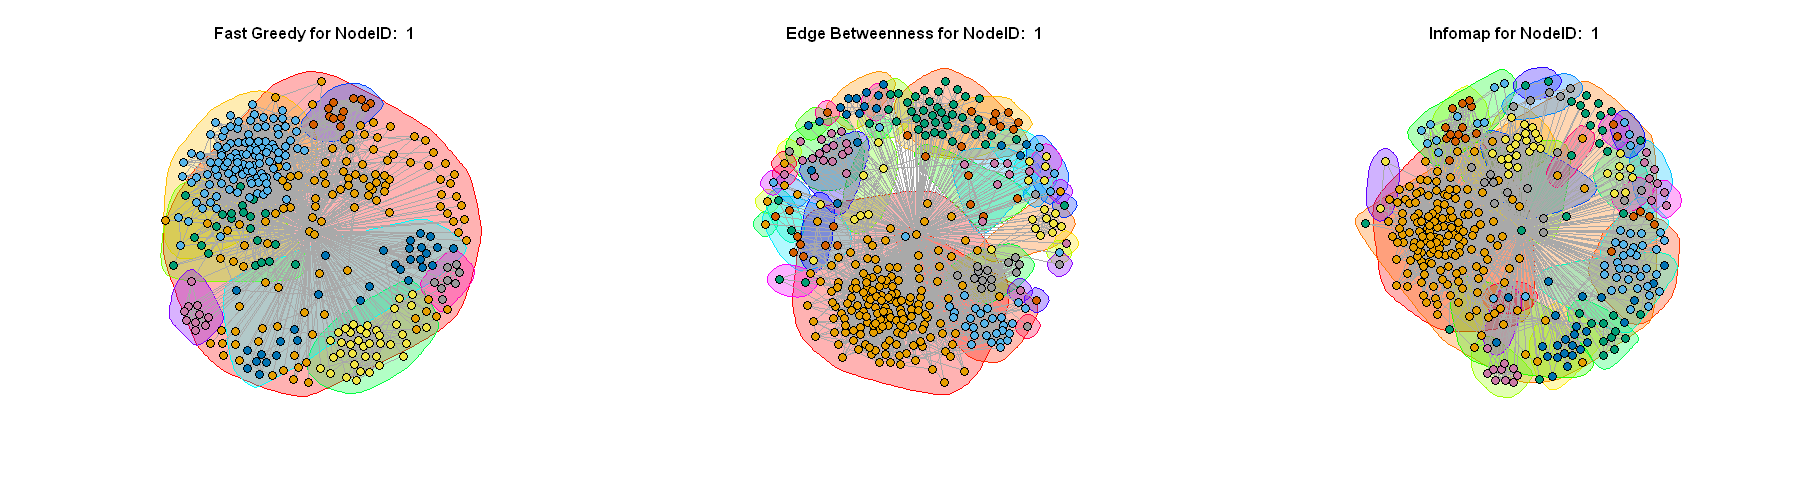

        Modularity of Infomap: 0.508        Modularity of Fast Greedy: 0.252        Modularity of Edge Betweenness: 0.134

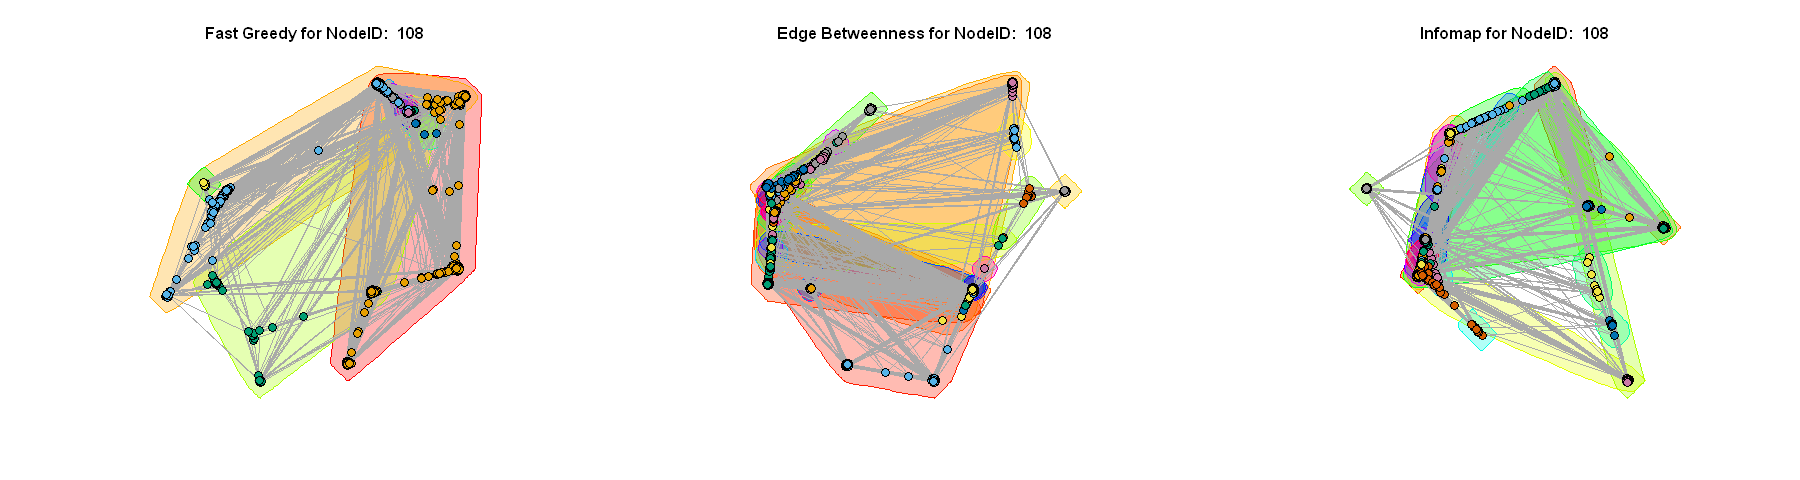

        Modularity of Infomap: 0.096        Modularity of Fast Greedy: 0.507        Modularity of Edge Betweenness: 0.489

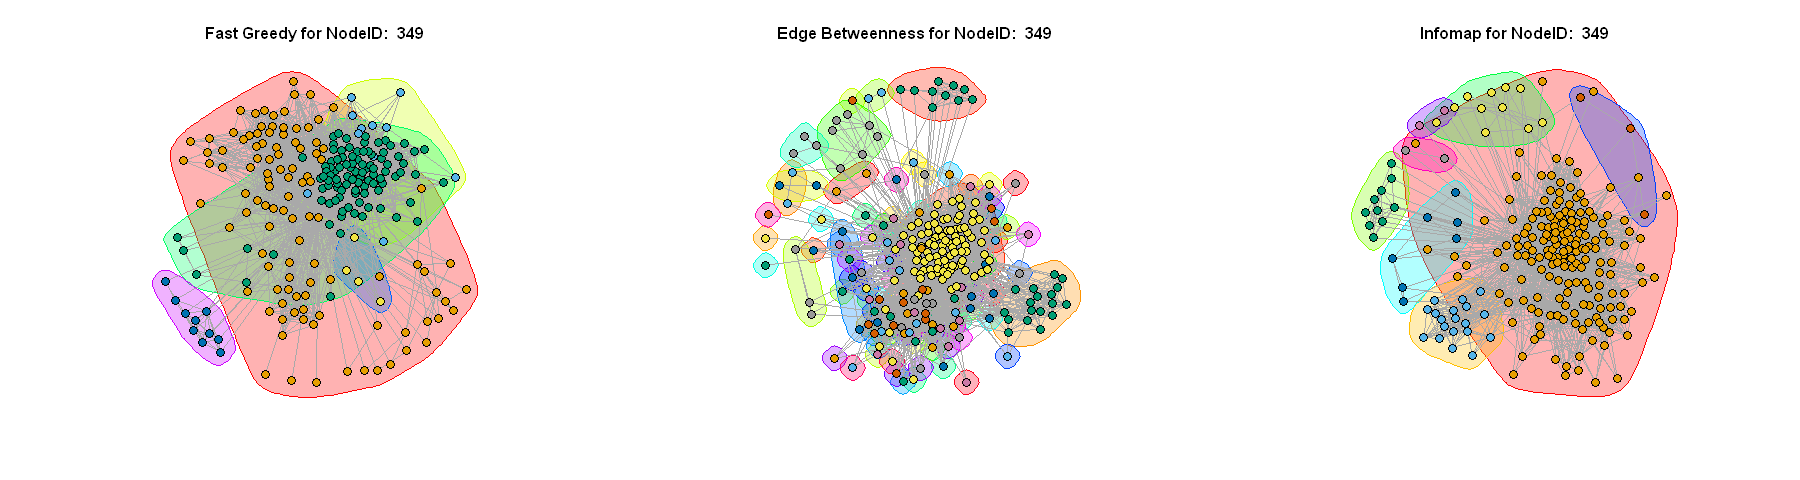

        Modularity of Infomap: 0.515        Modularity of Fast Greedy: 0.146        Modularity of Edge Betweenness: 0.028

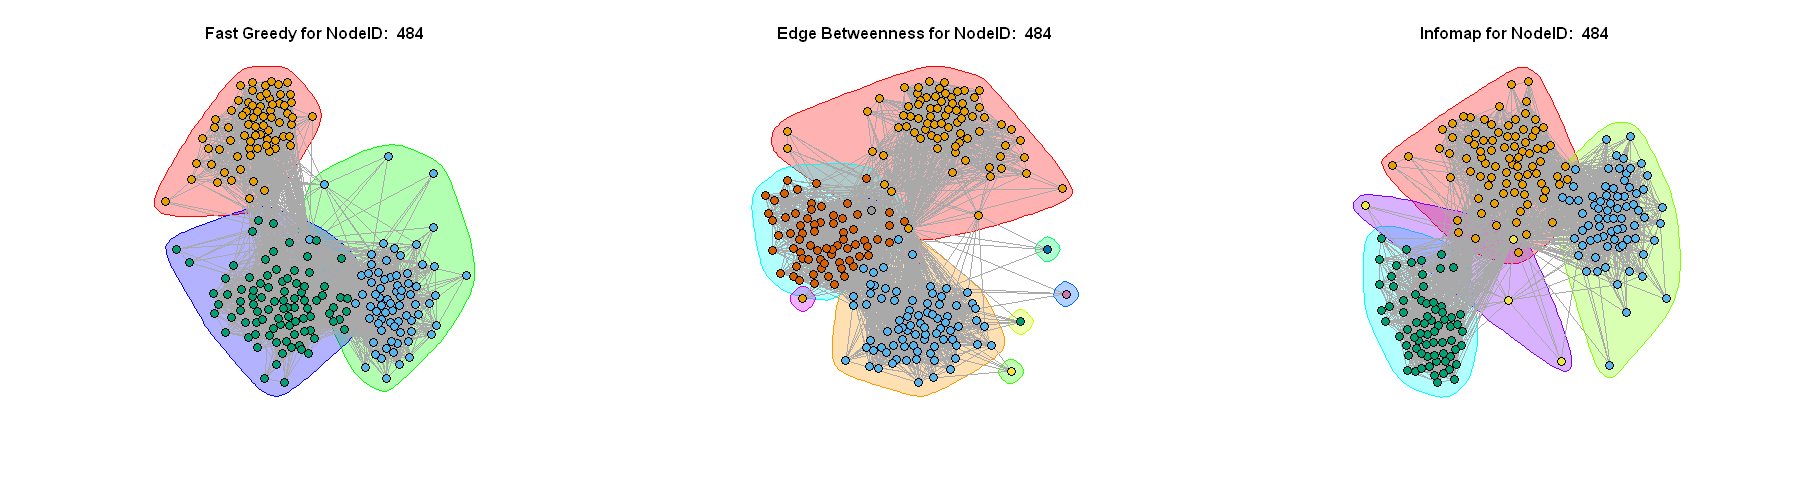

        Modularity of Infomap: 0.027

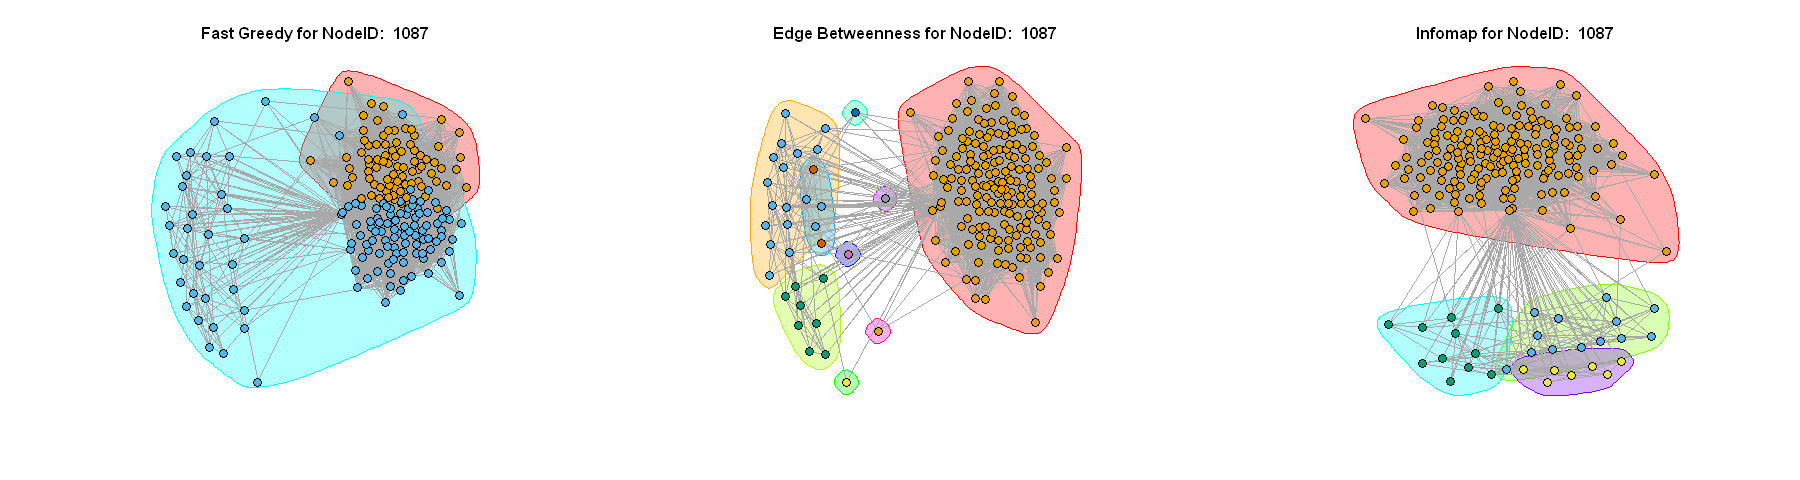

In [67]:
core_communities(facebook_graph)

        Modularity of Fast Greedy: 0.442        Modularity of Edge Betweenness: 0.416        Modularity of Infomap: 0.418        Modularity of Fast Greedy: 0.458        Modularity of Edge Betweenness: 0.521

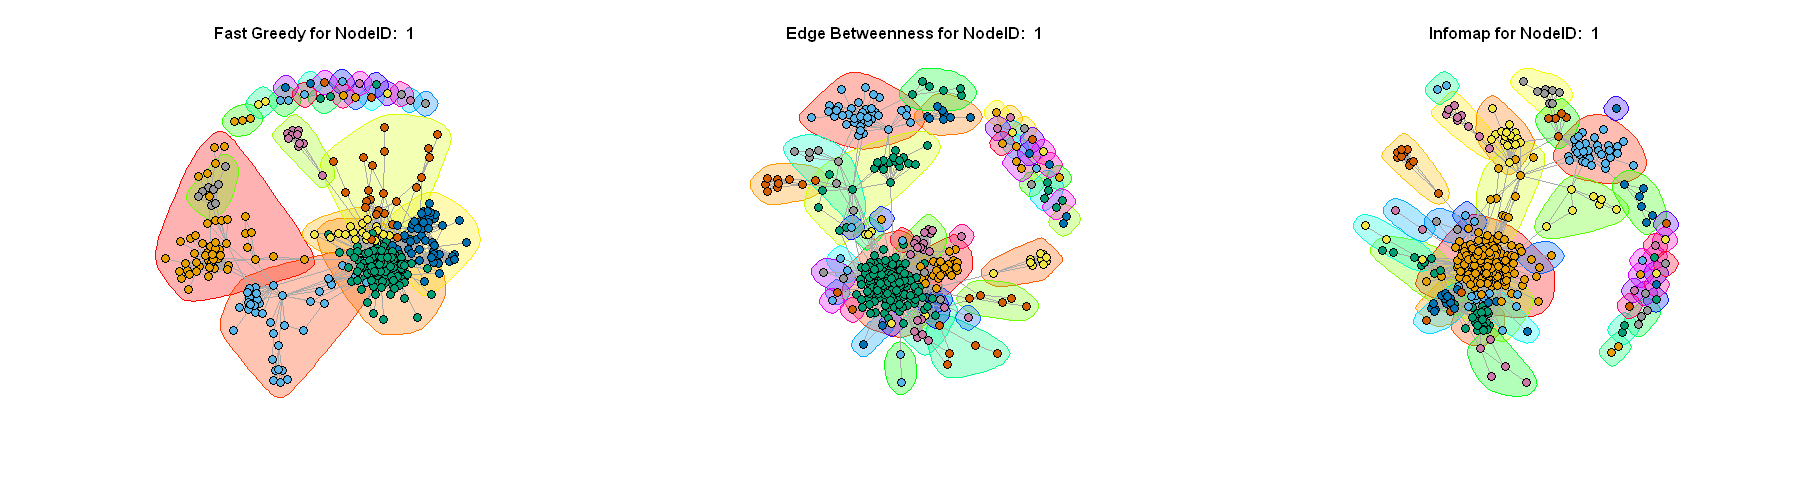

        Modularity of Infomap: 0.521        Modularity of Fast Greedy: 0.246        Modularity of Edge Betweenness: 0.151

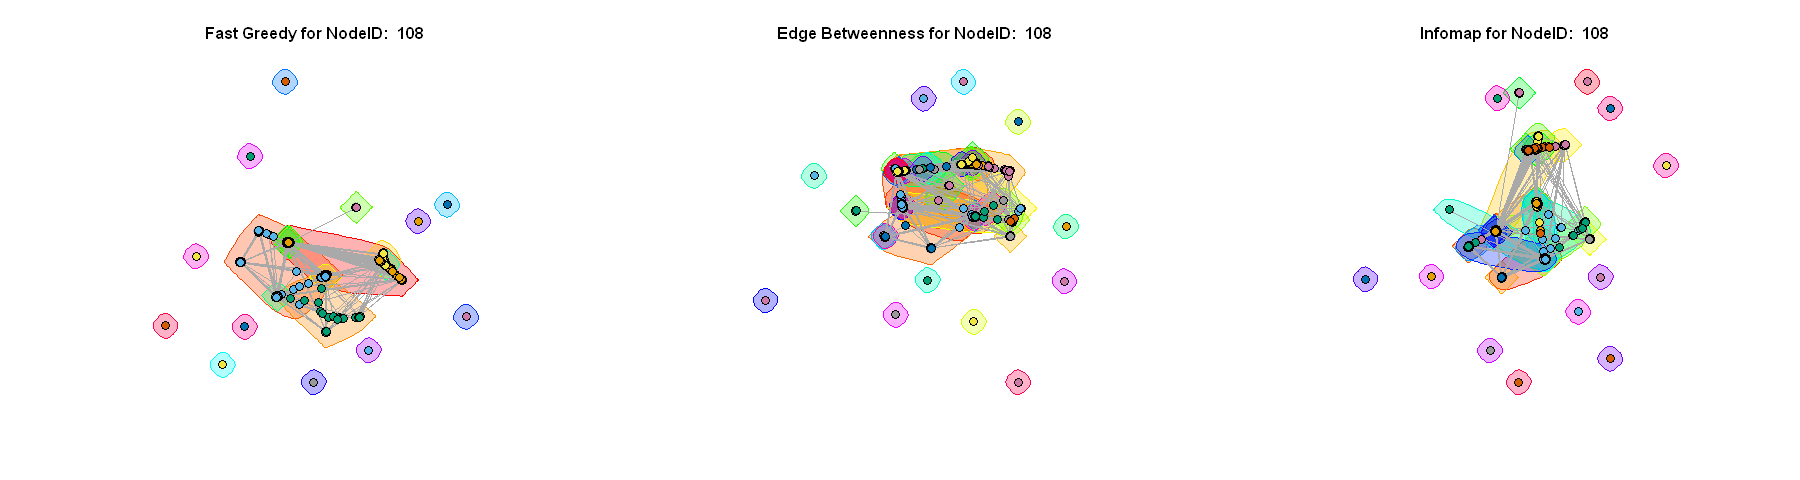

        Modularity of Infomap: 0.247        Modularity of Fast Greedy: 0.534        Modularity of Edge Betweenness: 0.515

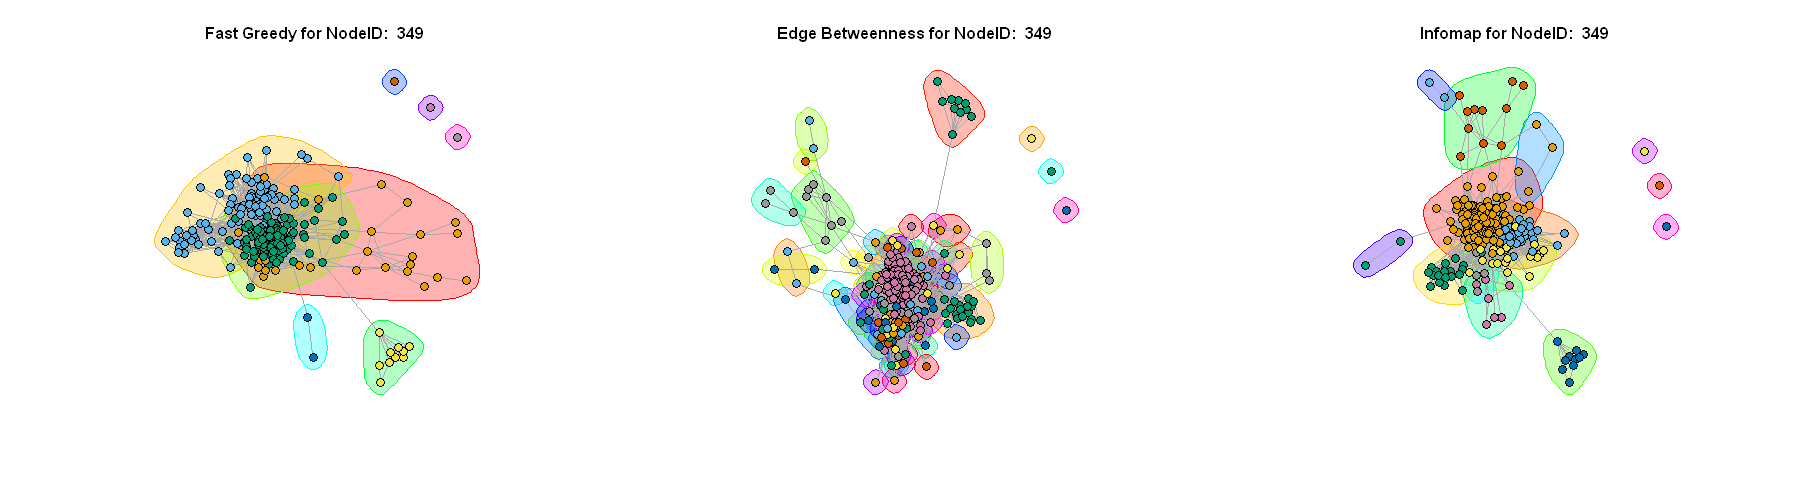

        Modularity of Infomap: 0.543        Modularity of Fast Greedy: 0.148        Modularity of Edge Betweenness: 0.032

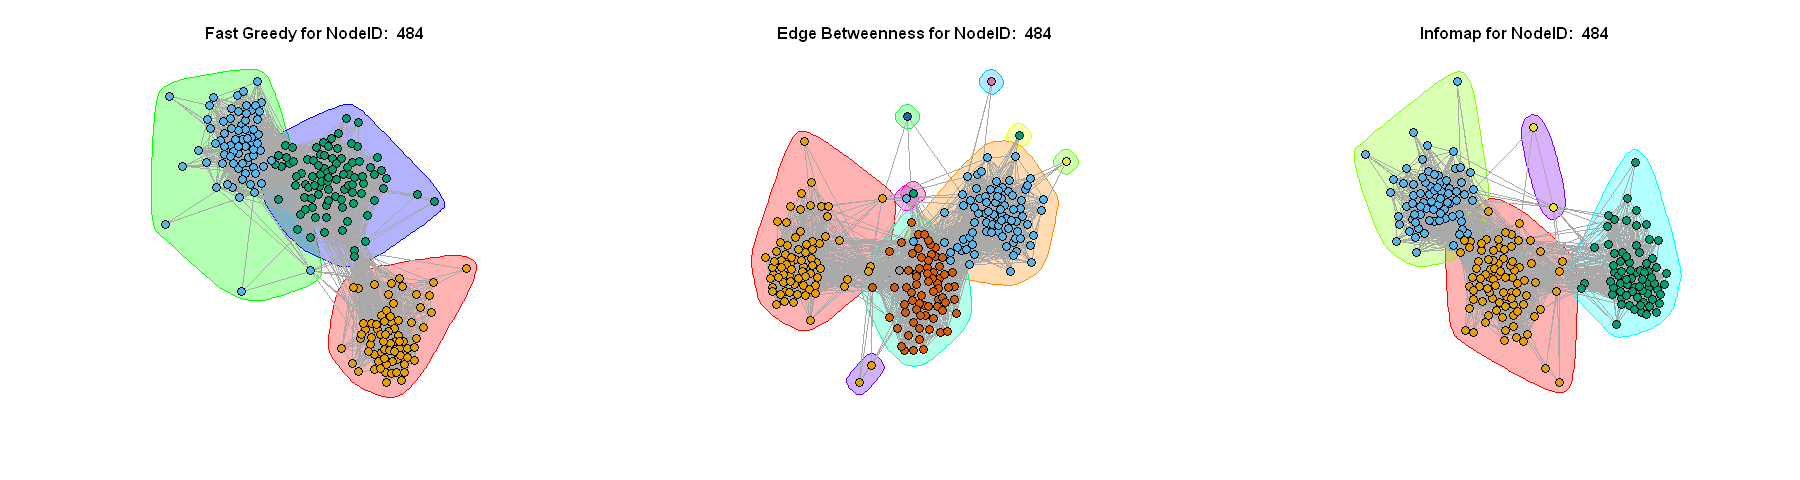

        Modularity of Infomap: 0.027

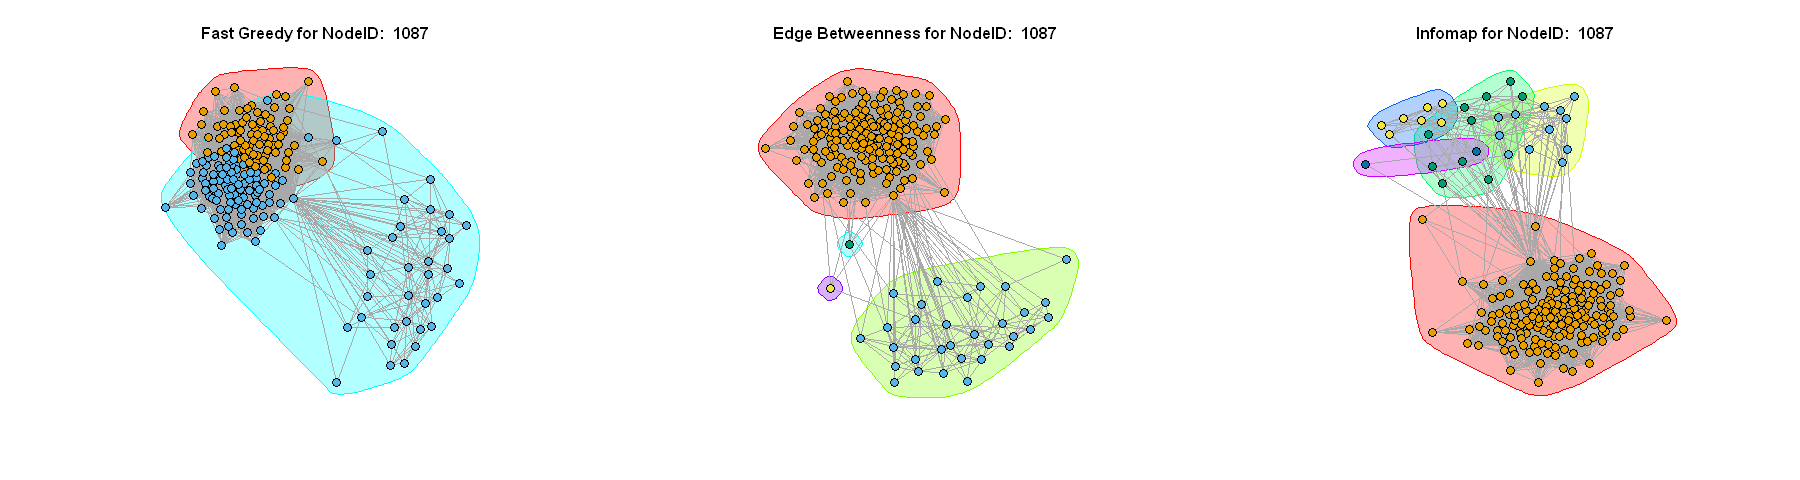

In [49]:
coreless_communities(facebook_graph)

In [50]:
dispersion = function(user_network, core, node) {
    node_name = V(user_network)[node]
    mutual_friends = neighbors(user_network, node)
    d = diameter(induced_subgraph(user_network, c(node_name,mutual_friends)))
    tmp_graph = induced_subgraph(user_network,mutual_friends)
    node_dis = sum(distances(tmp_graph))/2
    if (node_dis == "Inf" ){
        node_dis = d+10
    }
    return(node_dis)
}

embeddedness = function(user_network, core, node) {
    mutual_friends = neighbors(user_network, node)
    return(length(mutual_friends))
}

# Q12
find_embeddedness_dispersion = function(g, core_list=c(1,108,349,484,1087)){
    for (core in core_list) {
        user_neighbors = neighbors(g, core)
        user_vertices = c(core, user_neighbors)
        user_network = induced_subgraph(g, user_vertices)

        embeddedness = c()
        dispersion = c()
        for (node in V(user_network)) {
            node_embeddedness = embeddedness(user_network, core, node)
            embeddedness = c(embeddedness, node_embeddedness)
            node_dispersion = dispersion(user_network, core, node)

            dispersion = c(dispersion, node_dispersion)
        }

        embeddedness_hist = as.data.frame(table(embeddedness))
        embeddedness_hist[,1] = as.numeric(embeddedness_hist[,1])
        embeddedness_hist[,2]  = embeddedness_hist[,2] / sum(embeddedness_hist$Freq)

        plot(embeddedness_hist, paste(main="Embeddedness of core ", core))

        dispersion_hist = as.data.frame(table(dispersion))
        dispersion_hist[,1] = as.numeric(dispersion_hist[,1])
        dispersion_hist[,2]  = dispersion_hist[,2] / sum(dispersion_hist$Freq)

        plot(dispersion_hist, paste( main="Dispersion of core ", core))
    }
}

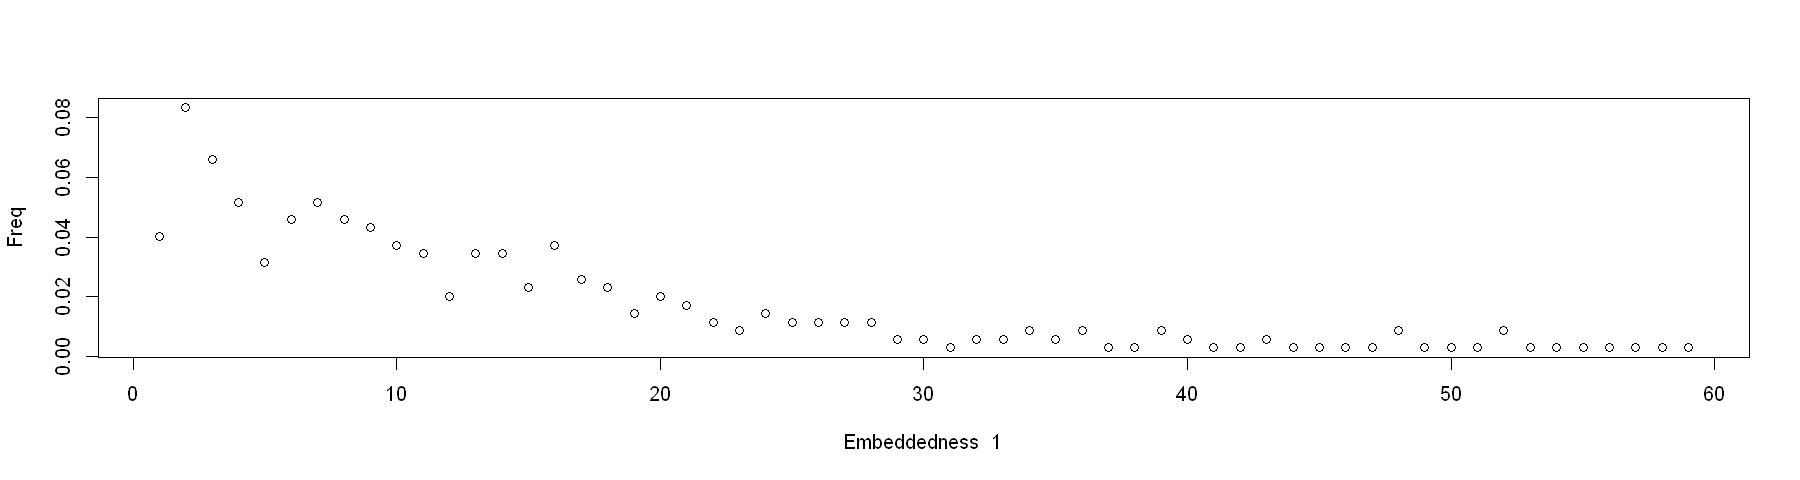

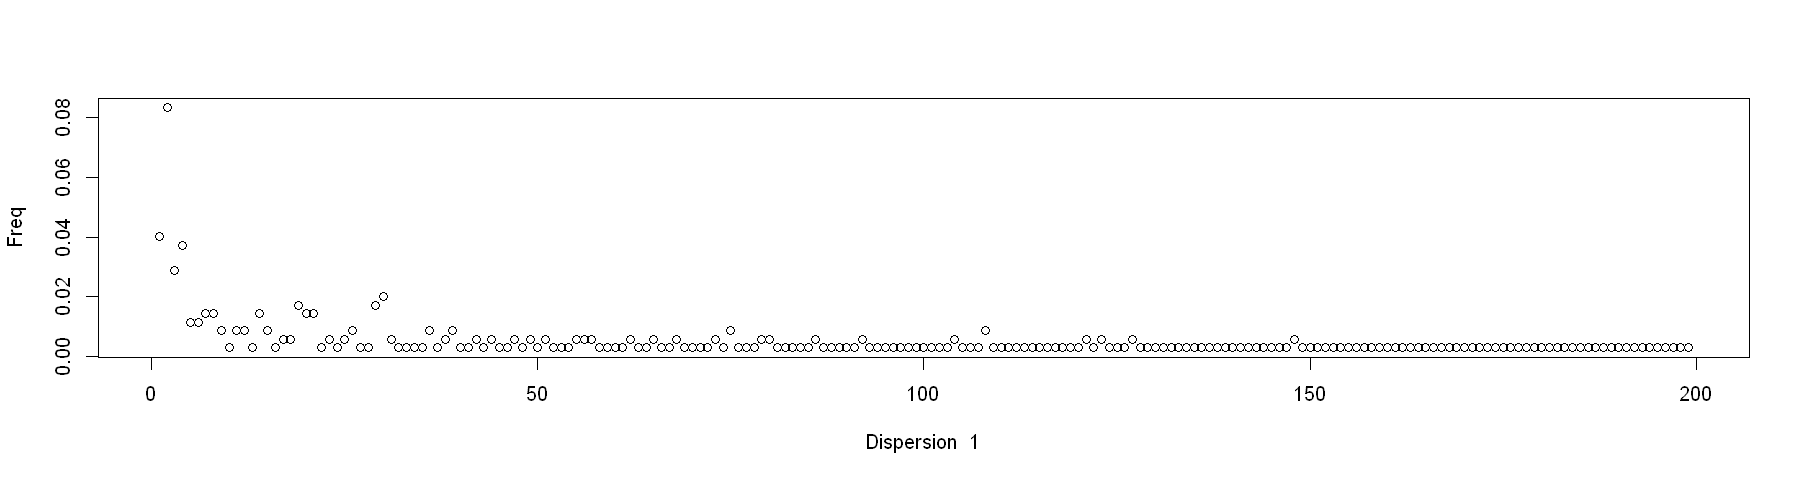

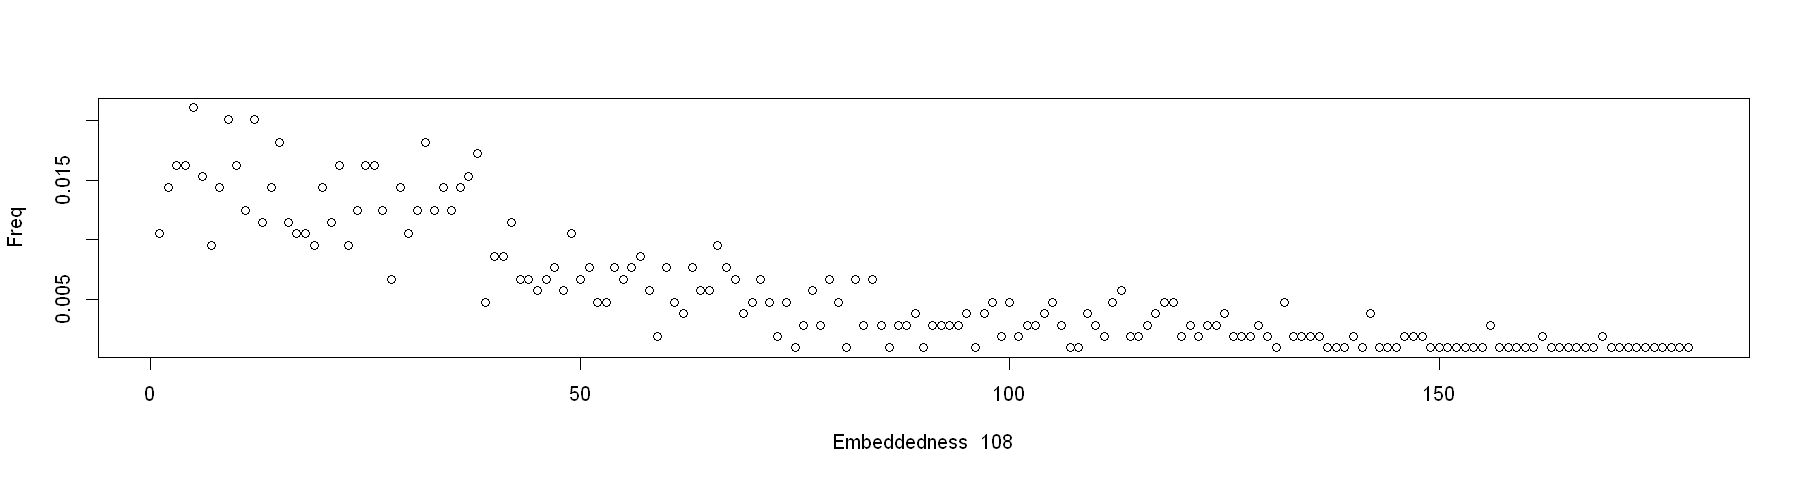

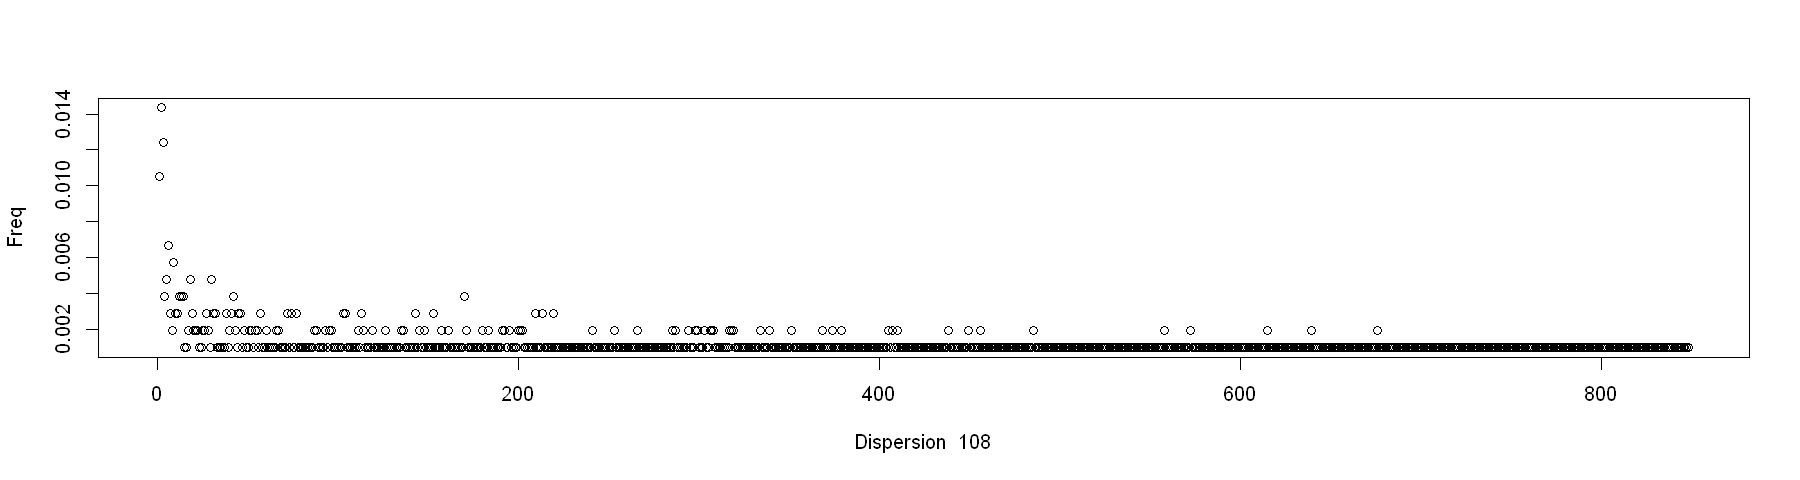

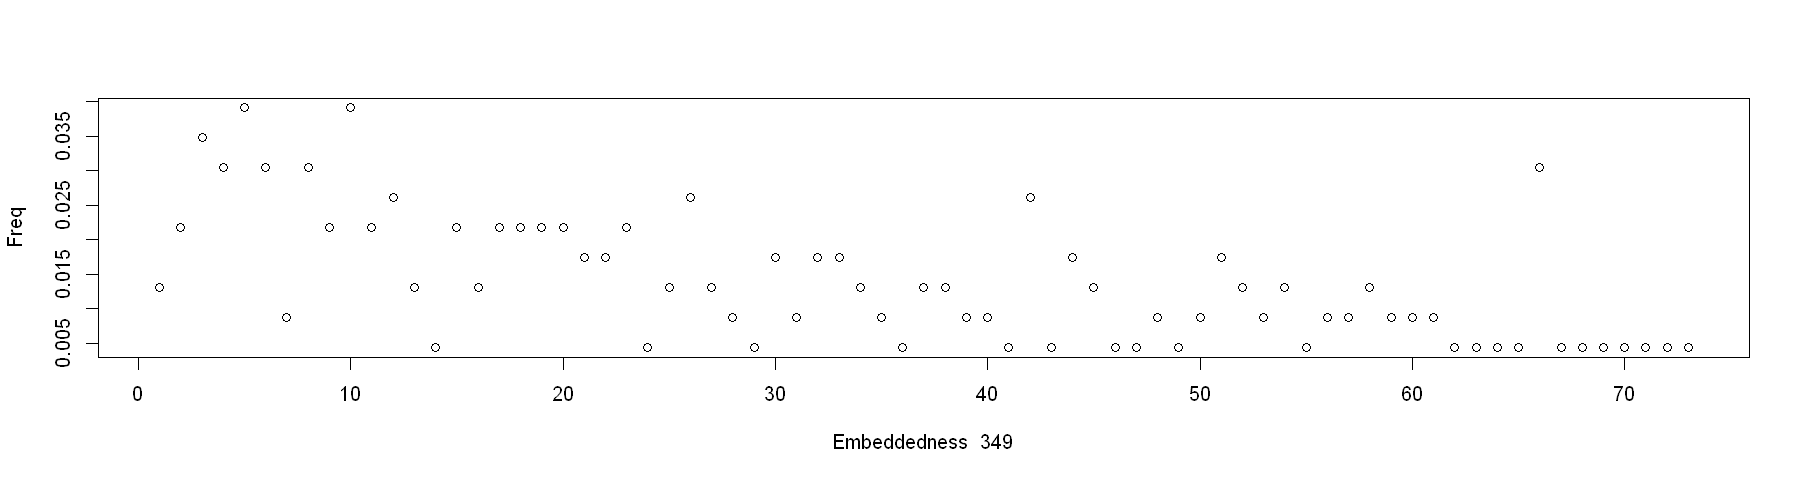

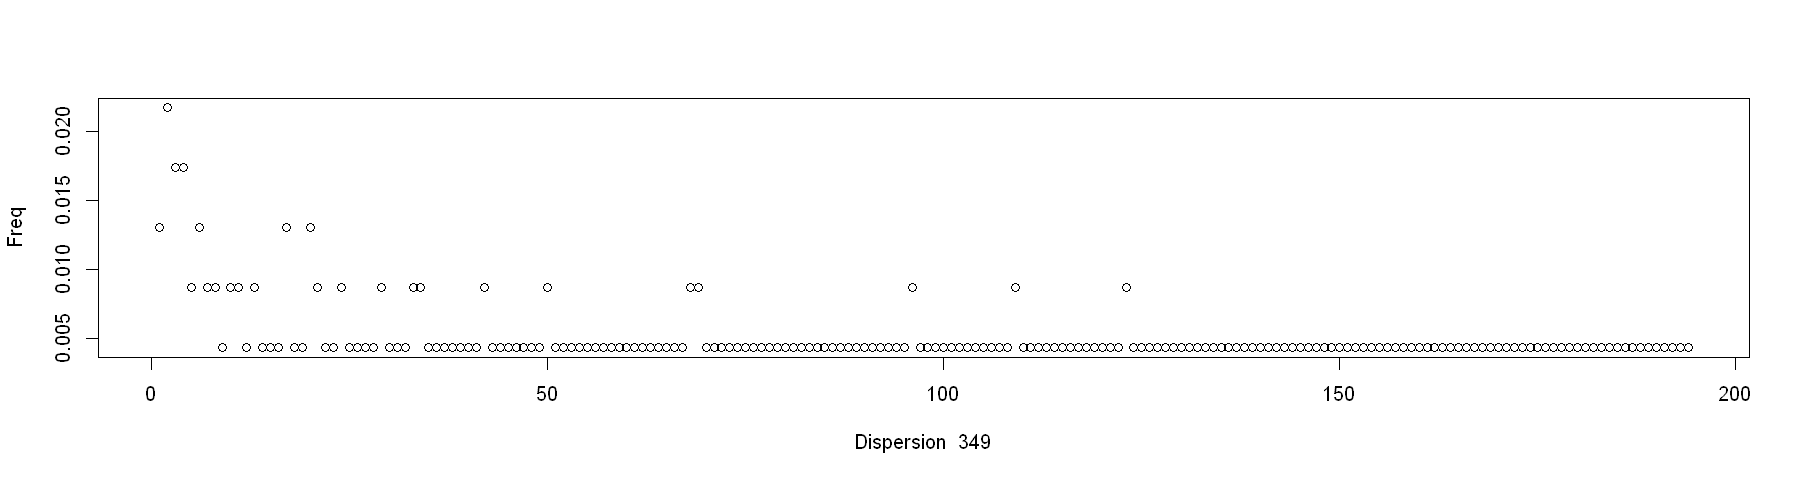

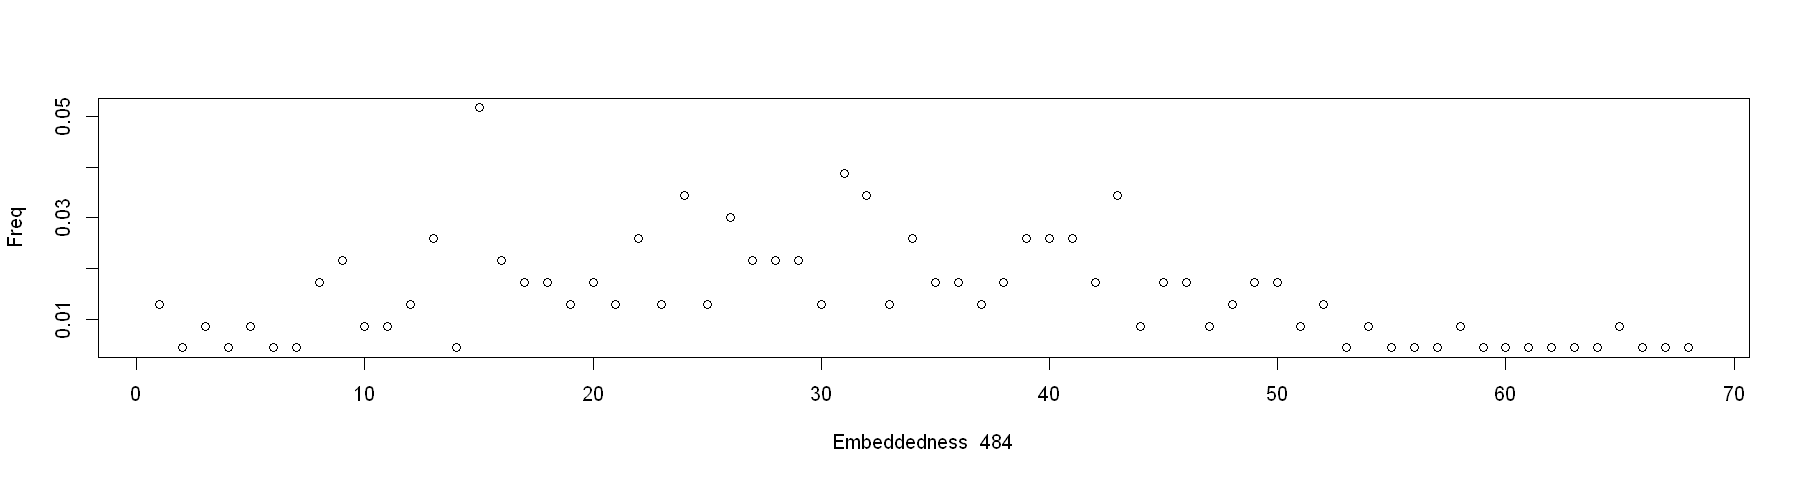

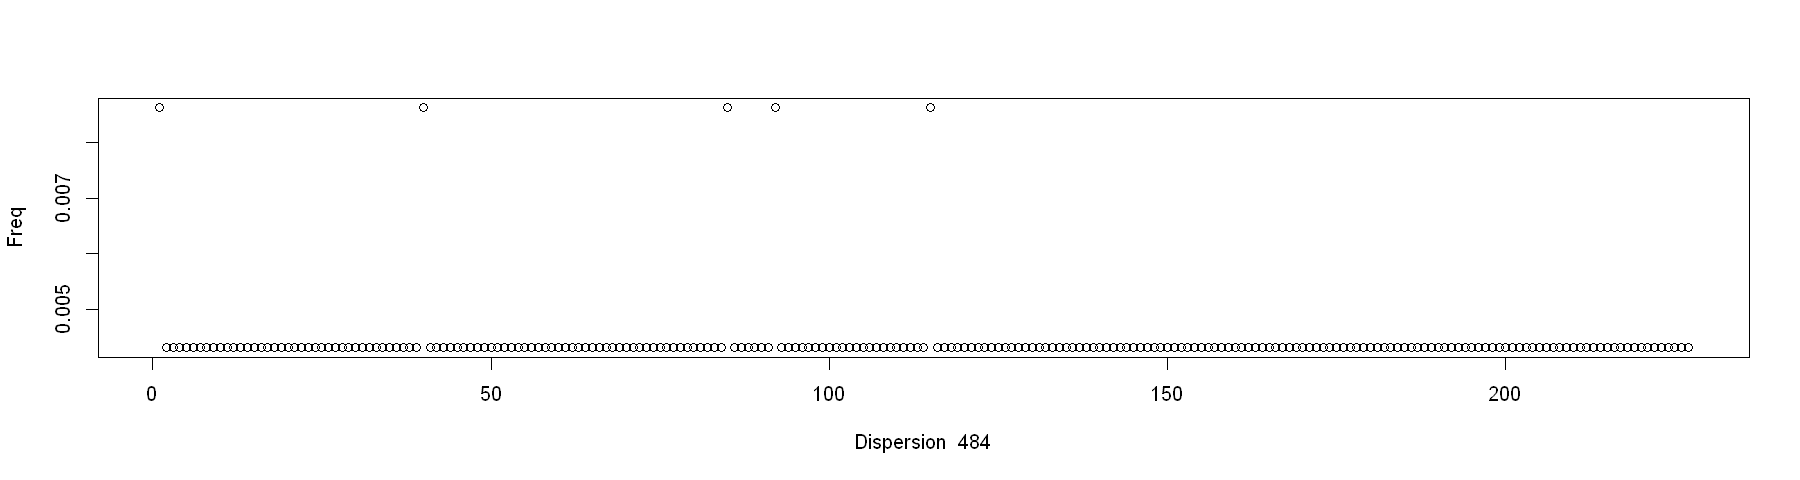

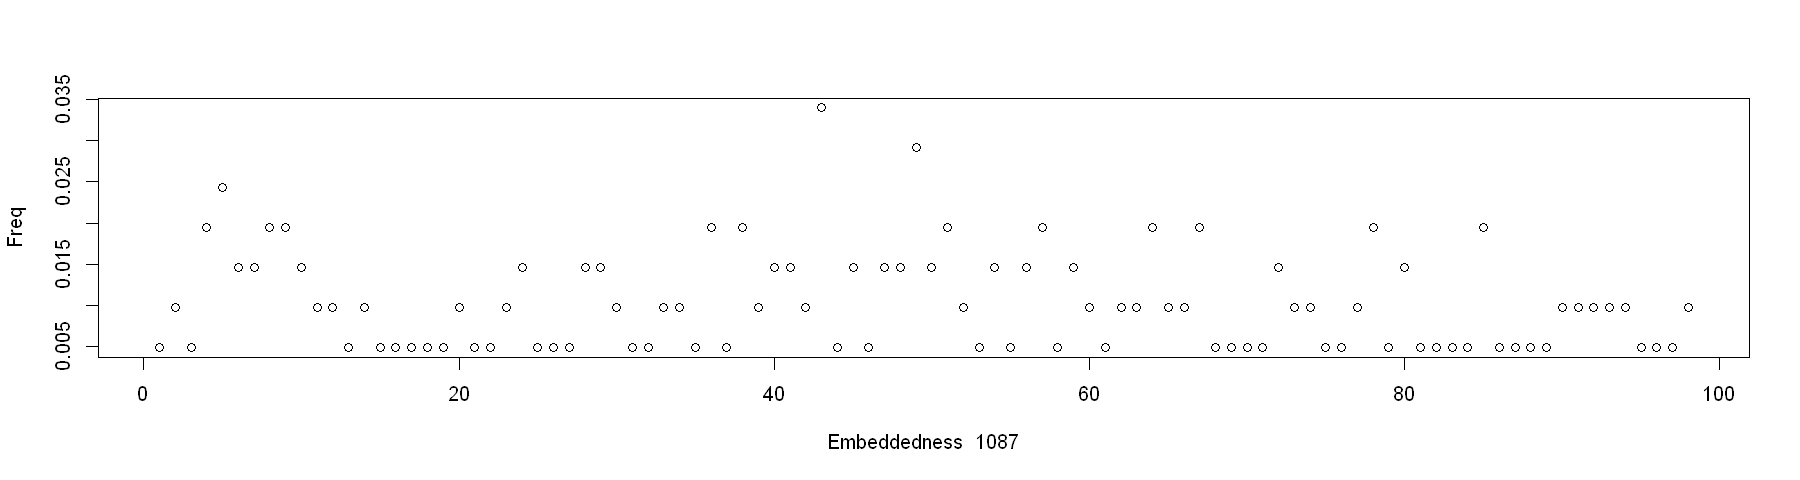

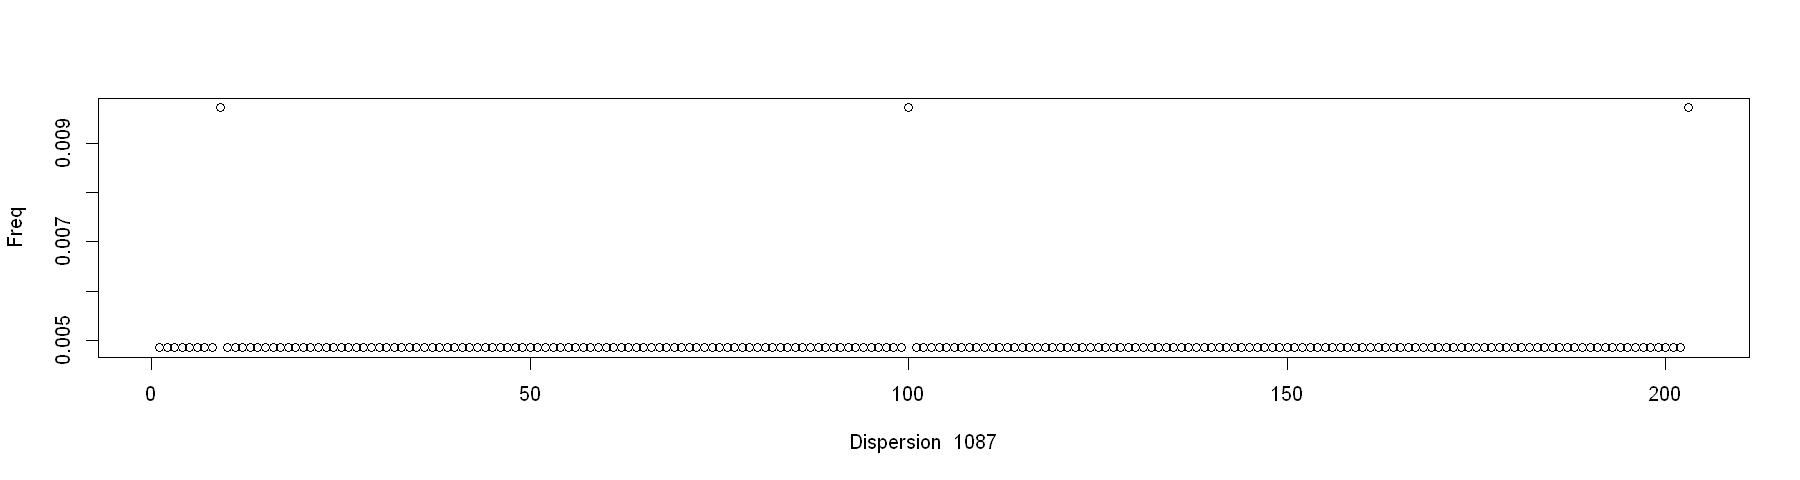

In [17]:
embed_and_distr(facebook_graph)

In [51]:
# Q13
max_dispersion = function(g, core_list=c(1,108,349,484,1087)) {
    for (core in core_list) {
        user_neighbors = neighbors(g, core)
        user_vertices = c(core, user_neighbors)
        user_network = induced_subgraph(g, user_vertices)

        max_node =  NA
        max_dispersion = 0

        for (node in V(user_network)) {
            disp = dispersion(user_network, core, node)
            if(disp > max_dispersion && node != core) {
                max_dispersion = disp
                max_node = node
            }
        }
        
        community = fastgreedy.community(user_network)

        edge_color = rep("gray", length(E(user_network)))
        edge_weight = rep(0.5, length(E(user_network)))
        node_color = rep(community$membership, length(V(user_network)))
        node_size = rep(4, length(V(user_network)))
        node_label = rep(NA, length(V(user_network)))

        edge_color[which(get.edgelist(user_network, name = FALSE)[,1] == max_node | 
                         get.edgelist(user_network, name = FALSE)[,2] == max_node)] = "yellow"
        edge_weight[which(get.edgelist(user_network, name = FALSE)[,1] == max_node |  
                          get.edgelist(user_network, name = FALSE)[,2] == max_node)] = 4

        node_color[max_node] = "yellow"
        node_size[max_node] = 20
        node_label[max_node] = max_node
        
        plot(user_network, vertex.size = node_size, 
                    edge.width = edge_weight, edge.color = edge_color, vertex.color = node_color, vertex.label=node_label,
                   main = paste("Community Structure (Max Dispersion Node, core node ", core, ")"))
    }
}

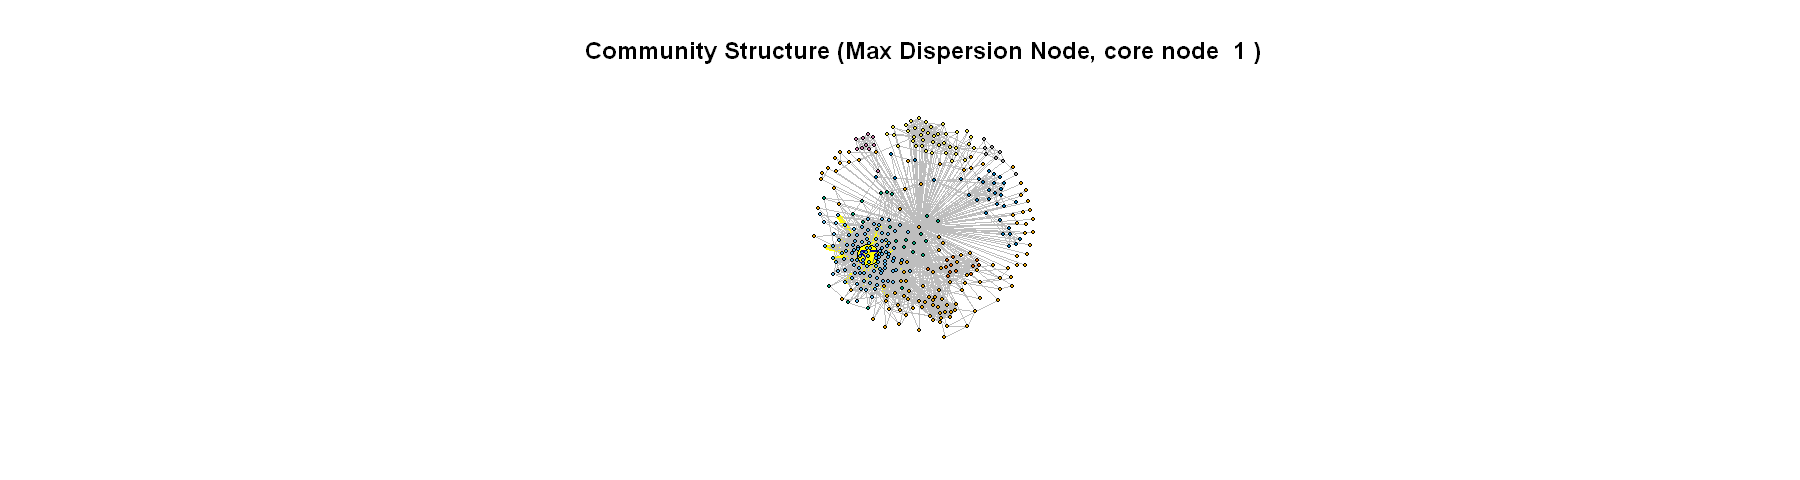

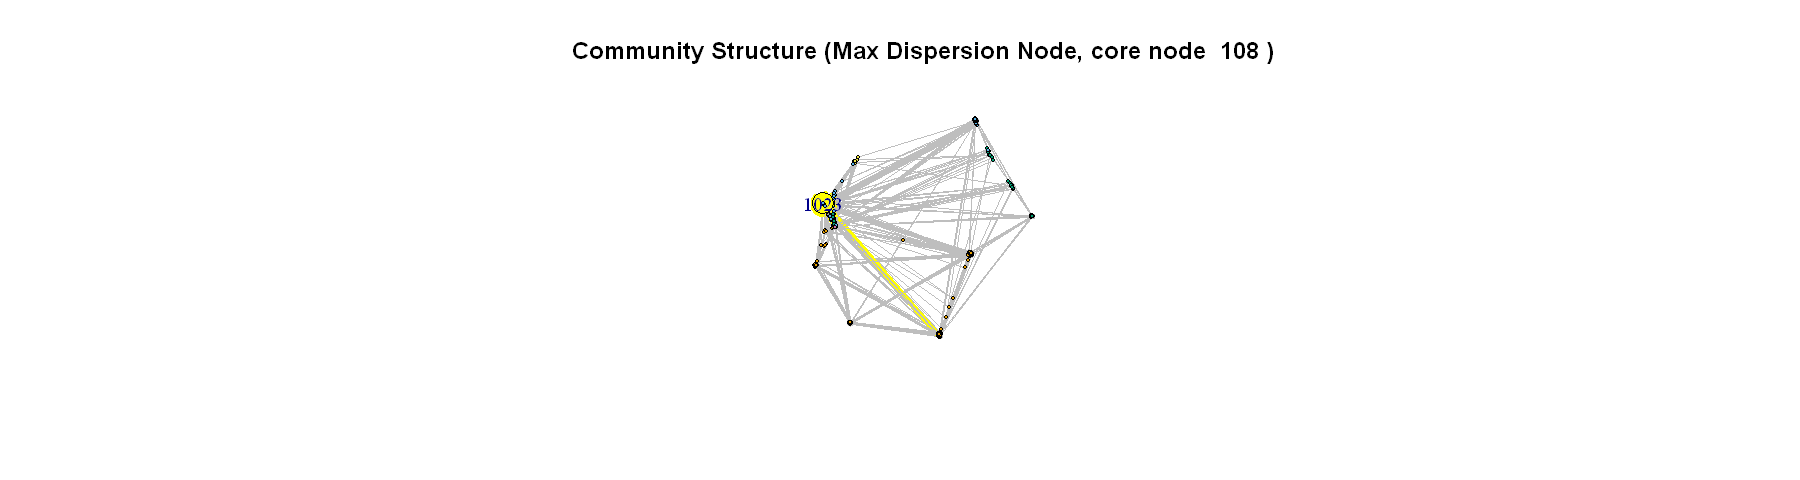

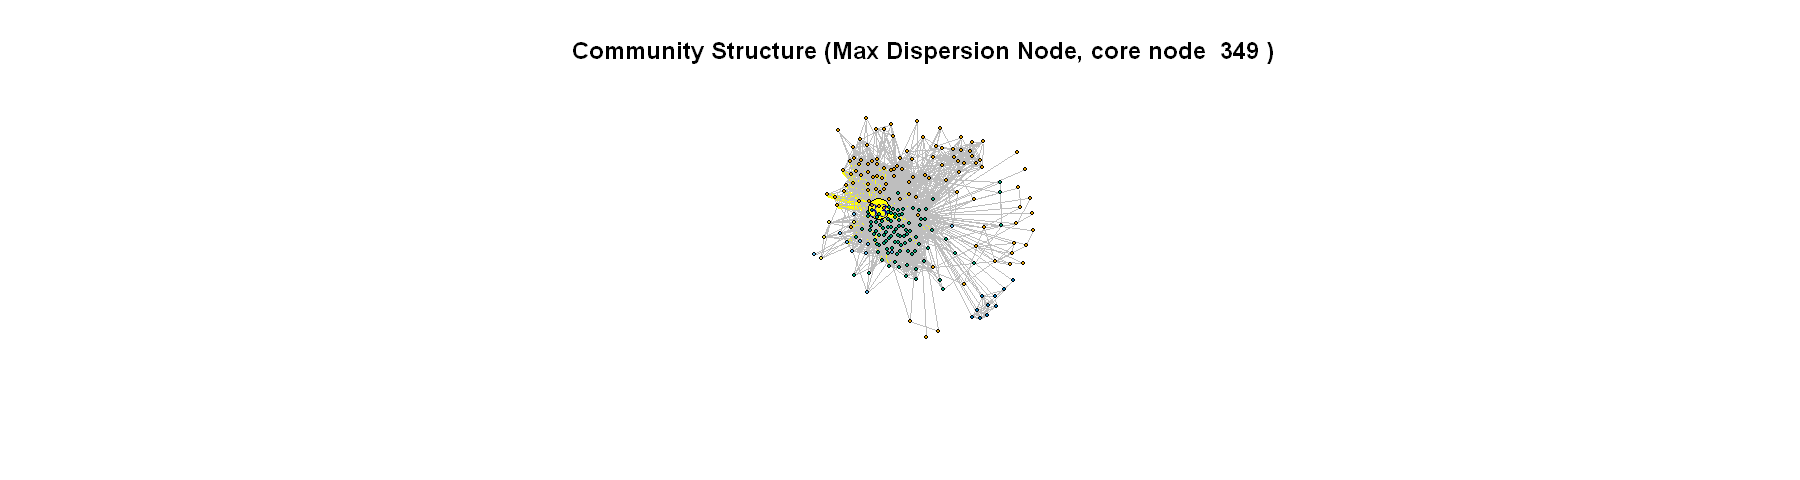

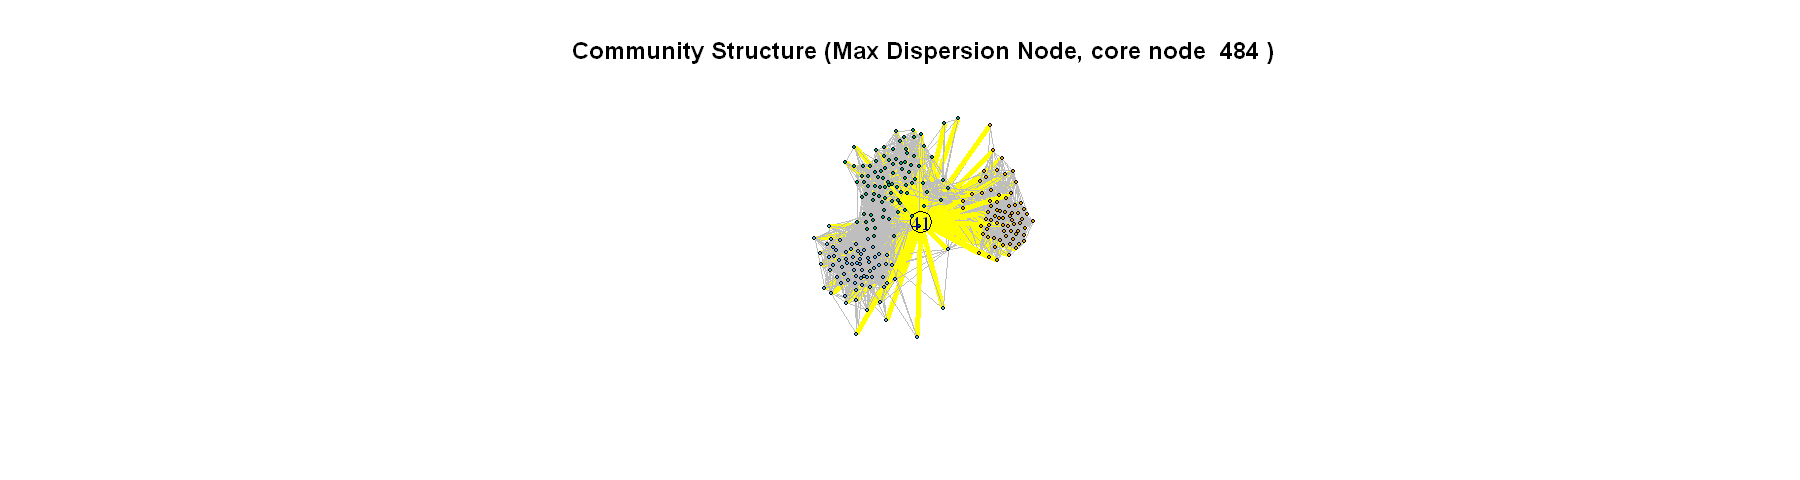

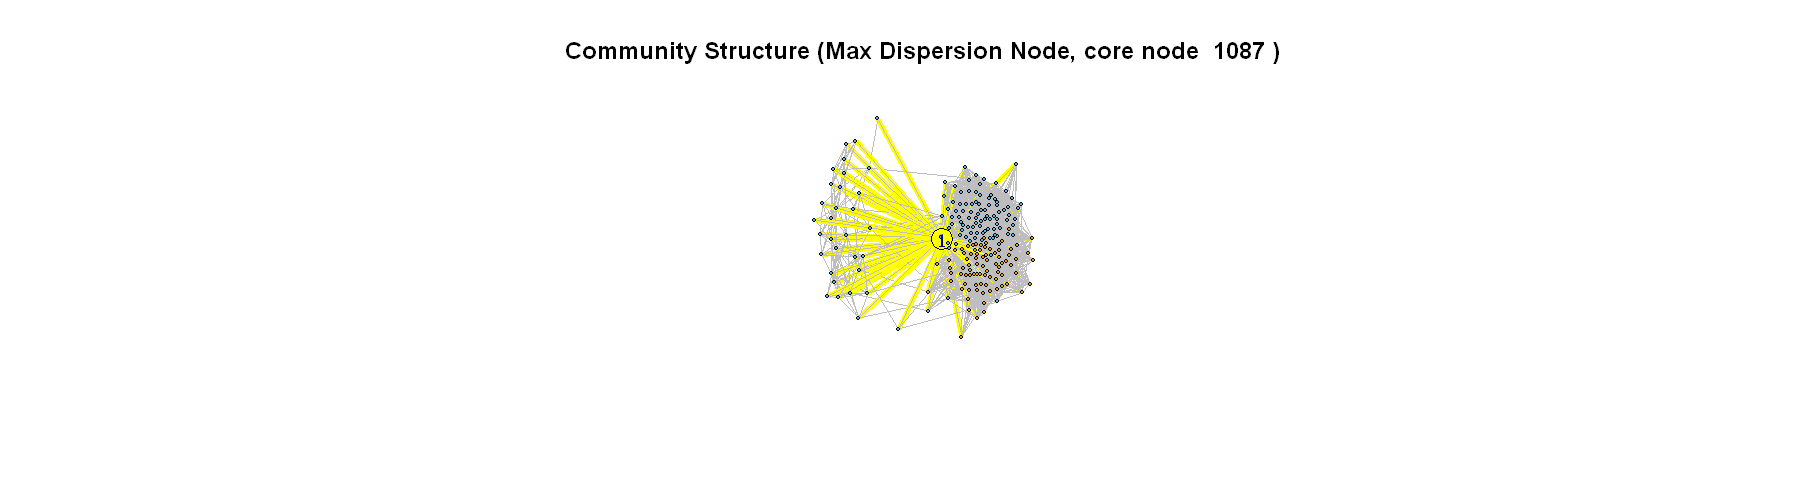

In [52]:
max_dispersion(facebook_graph)

In [65]:
# Q14
max_embed = function(g, core_list=c(1,108,349,484,1087)) {
    
    for (core in core_list) {
        user_neighbors = neighbors(g, core)
        user_vertices = c(core, user_neighbors)
        user_network = induced_subgraph(g, user_vertices)

        max_enode =  NA
        max_embeddedness = 0
        max_denode = NA
        max_dispersion_embeddedness = 0

        for (node in V(user_network)) {
            embed = embeddedness(user_network, core, node)
            if (embed > max_embeddedness && node != core) {
                max_embeddedness = embed
                max_enode = node
            }
            
            disp = dispersion(user_network, core, node)
            if (disp != 0 && (disp/embed) > max_dispersion_embeddedness && node != core) {
                max_dispersion_embeddedness = disp/embed
                max_denode = node
            }
        }
        community = fastgreedy.community(user_network)

        edge_color = rep("gray", length(E(user_network)))
        edge_weight = rep(0.5, length(E(user_network)))
        node_color = rep(community$membership, length(V(user_network)))
        node_size = rep(4, length(V(user_network)))
        node_label = rep(NA, length(V(user_network)))

        edge_color[which(get.edgelist(user_network, name = TRUE)[,1] == max_denode | 
                         get.edgelist(user_network, name = TRUE)[,2] == max_denode)] = "yellow"
        edge_color[which(get.edgelist(user_network, name = TRUE)[,1] == max_enode | 
                         get.edgelist(user_network, name = TRUE)[,2] == max_enode)] = "orange"

        edge_weight[which(get.edgelist(user_network, name = TRUE)[,1] == max_denode |  
                          get.edgelist(user_network, name = TRUE)[,2] == max_denode |
                          get.edgelist(user_network, name = TRUE)[,1] == max_enode |
                          get.edgelist(user_network, name = TRUE)[,2] == max_enode)] = 3

        node_color[max_denode] = "yellow"
        node_color[max_enode] = "orange"

        node_size[max_denode] = 20
        node_size[max_enode] = 20
        node_label[max_denode] = max_denode
        node_label[max_denode] = max_enode
        
        print(max_enode)
        print(max_denode)
        
        plot(user_network, vertex.size = node_size, vertex.label = node_label,
                    edge.width = edge_weight, edge.color = edge_color, vertex.color = node_color, 
                   main = paste("Community Structure (Max dispersion/embeddedness Node, core node ", core, ")"))
    }
}

[1] 57
[1] 57
[1] 3
[1] 1023


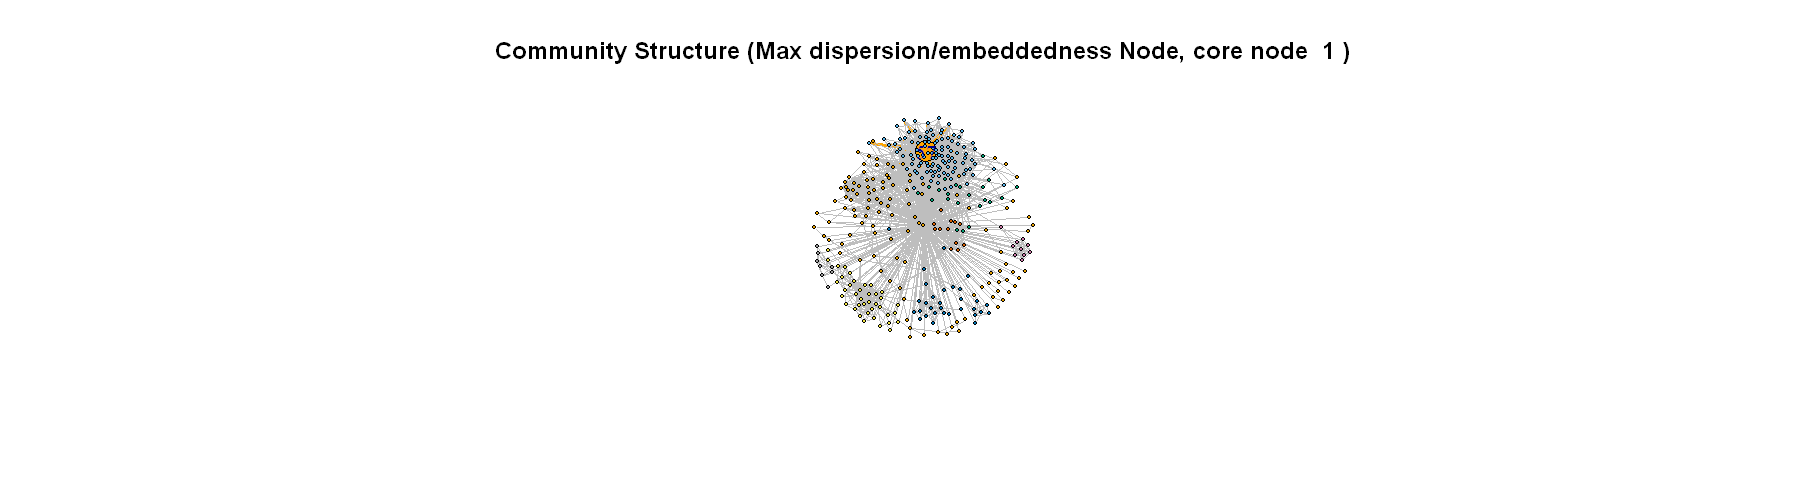

[1] 5
[1] 33


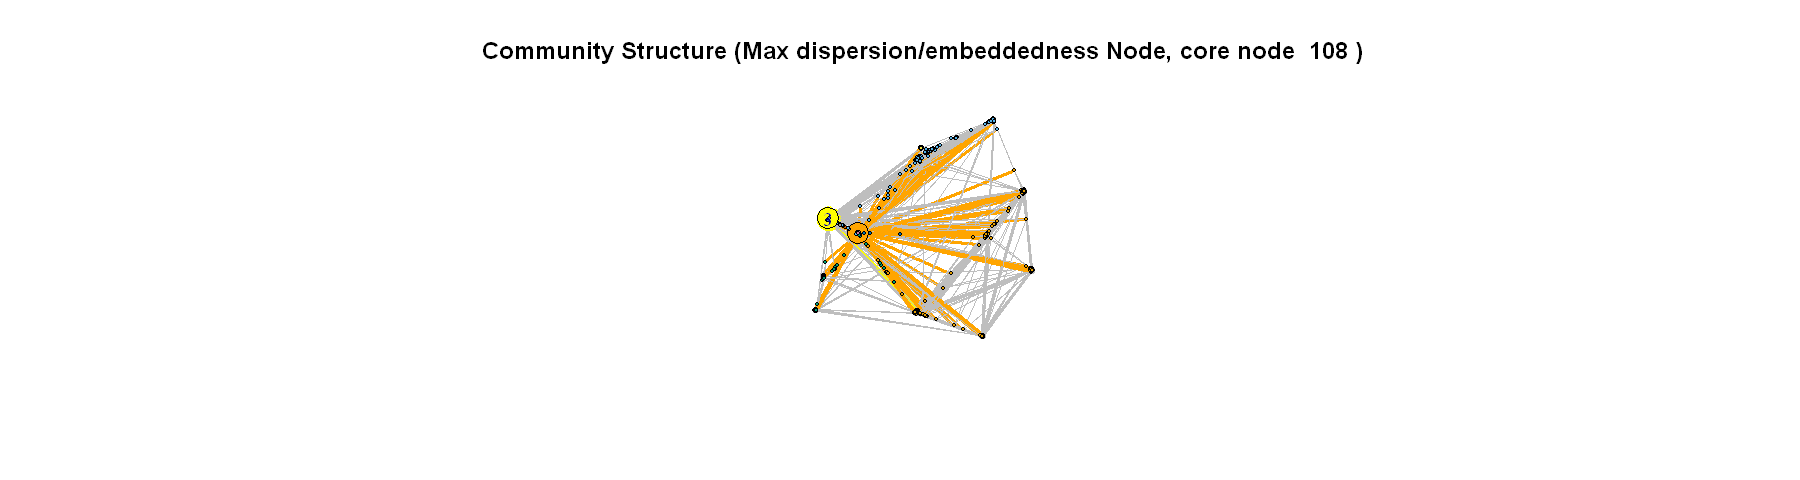

[1] 41
[1] 41


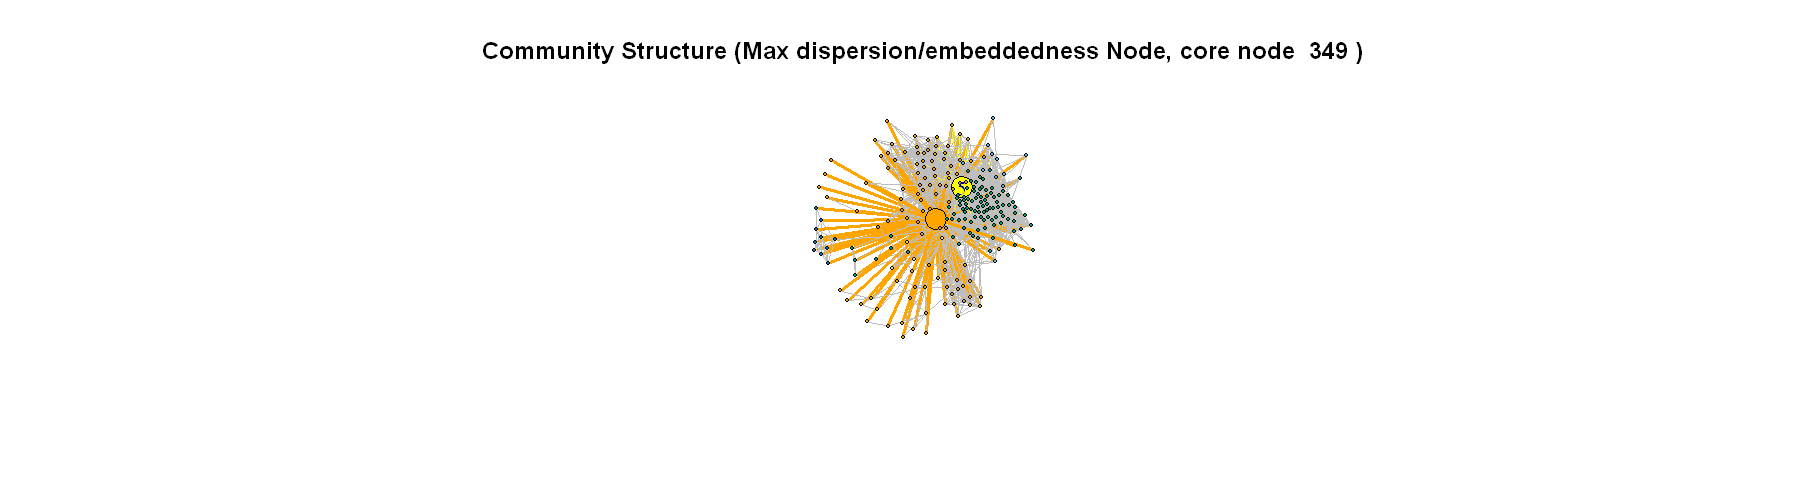

[1] 1
[1] 1


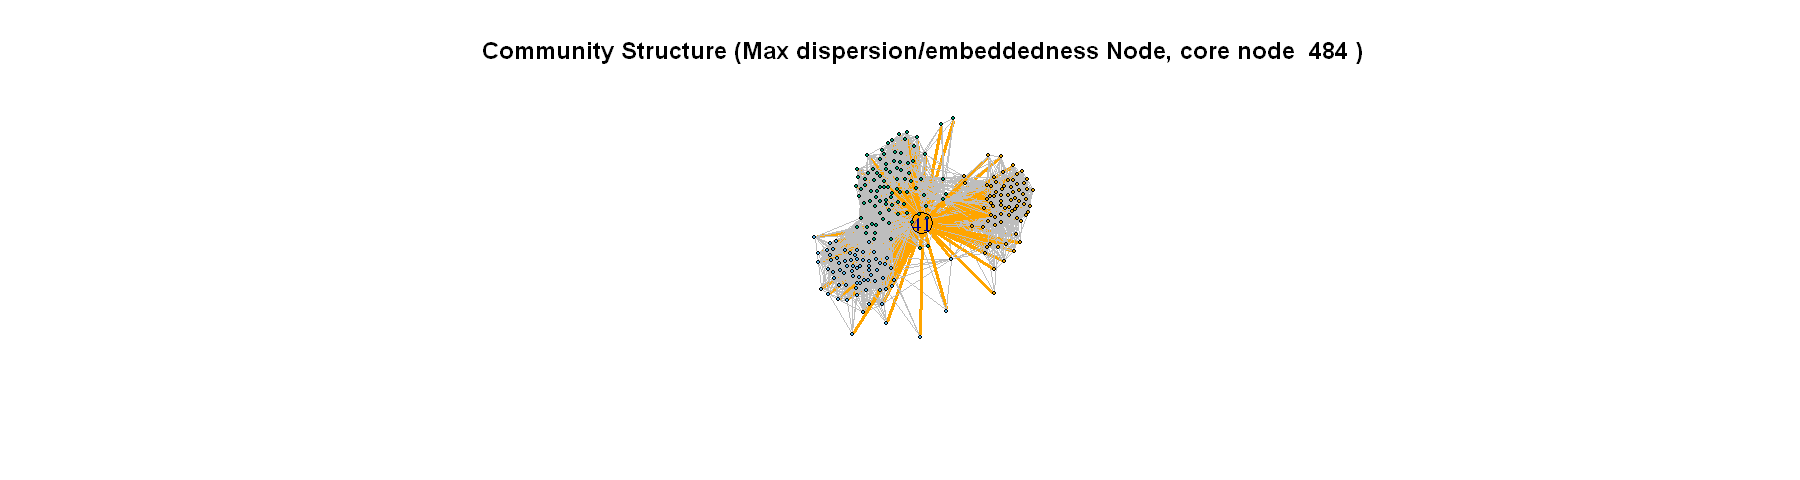

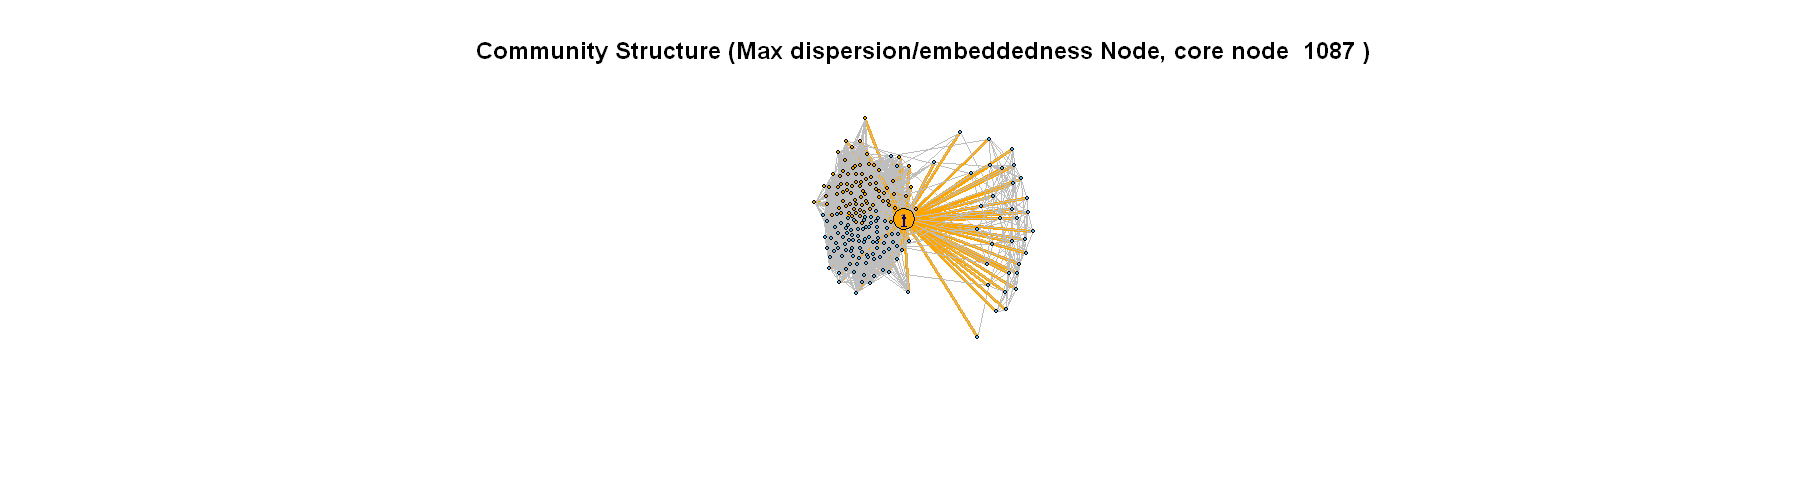

In [66]:
max_embed(facebook_graph)